Resultados por proceso:
   id  arribo  espera  duracion   total
0  P1       0  0.0000    0.1459  0.1460
1  P2     100  0.0459    0.0784  0.1243
2  P3     200  0.0241    0.1491  0.1732
3  P4     300  0.0733    0.0775  0.1508
4  P5     400  0.0508    0.0509  0.1017

 Metricas globales:
Throughput: 9.93 procesos/segundo
Overhead total: 0.5035 segundos


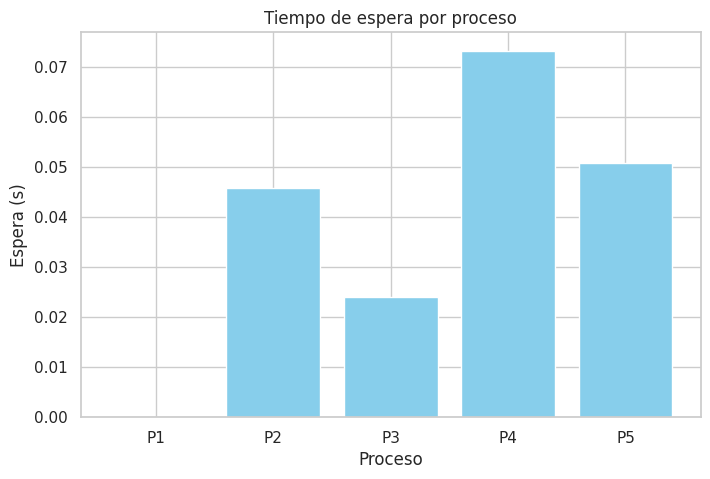

/tmp/ipython-input-3727740464.py:82: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




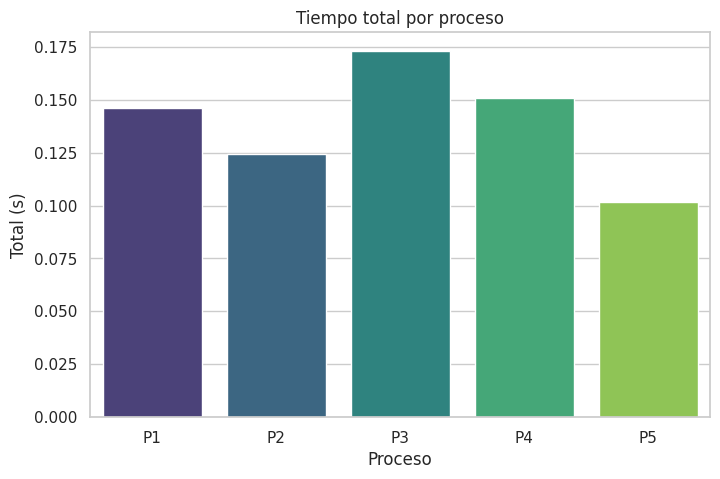

In [4]:
# Importacion de modulos
import threading
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Inicializacion de semaforo
semaforo = threading.Semaphore(1)

# Lista para registrar métricas
resultados = []

# Funcion simulada de acceso al recurso
def proceso(id, arribo):
    time.sleep(arribo / 1000)  # Simula tiempo de llegada
    inicio_espera = time.time()
    semaforo.acquire()
    tiempo_espera = time.time() - inicio_espera

    inicio_ejecucion = time.time()
    time.sleep(random.uniform(0.05, 0.15))  # Simula uso del recurso
    fin_ejecucion = time.time()

    semaforo.release()

    resultados.append({
        "id": id,
        "arribo": arribo,
        "espera": round(tiempo_espera, 4),
        "duracion": round(fin_ejecucion - inicio_ejecucion, 4),
        "total": round(fin_ejecucion - inicio_espera, 4)
    })

# Simulacion de procesos
procesos = [
    {"id": "P1", "arribo": 0},
    {"id": "P2", "arribo": 100},
    {"id": "P3", "arribo": 200},
    {"id": "P4", "arribo": 300},
    {"id": "P5", "arribo": 400},
]

hilos = []
inicio_total = time.time()
for p in procesos:
    hilo = threading.Thread(target=proceso, args=(p["id"], p["arribo"]))
    hilos.append(hilo)
    hilo.start()

for hilo in hilos:
    hilo.join()
fin_total = time.time()

# Metricas globales
throughput = round(len(procesos) / (fin_total - inicio_total), 2)
overhead = round(fin_total - inicio_total, 4)

# DataFrame para visualizacion
df = pd.DataFrame(resultados)
print("Resultados por proceso:")
print(df)

print("\n Metricas globales:")
print(f"Throughput: {throughput} procesos/segundo")
print(f"Overhead total: {overhead} segundos")

# Grafico 1: Tiempo de espera
plt.figure(figsize=(8, 5))
plt.bar(df["id"], df["espera"], color="skyblue")
plt.title("Tiempo de espera por proceso")
plt.xlabel("Proceso")
plt.ylabel("Espera (s)")
plt.grid(True)
plt.show()

#  Grafico 2: Total por proceso
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x="id", y="total", data=df, palette="viridis")
plt.title("Tiempo total por proceso")
plt.xlabel("Proceso")
plt.ylabel("Total (s)")
plt.show()

# Grafico 3: Espera por proceso
fig = px.line(df, x="id", y="espera", title="Espera por proceso", markers=True)
fig.show()